In [6]:
import pandas as pd; import numpy as np

In [7]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,-0.249228,-0.135726
1,a,two,-1.727209,0.103633
2,b,three,1.459027,-1.109016
3,b,one,0.703312,-0.335563
4,a,two,0.291779,1.660459
5,b,three,0.204065,-0.225371


In [8]:
df.groupby(['key1', 'key2'])[['data1']].mean()

data1
key1 key2           
a    one   -0.249228
     two   -0.717715
b    one    0.703312
     three  0.831546

In [51]:
np.random.seed(12)
fruit=pd.DataFrame(np.random.randint(1,10, size=(4,4)),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,7,2,3,4
cherry,4,1,7,2
banana,5,6,3,7
kiwi,1,6,9,3


In [52]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}
label

{'a': 'green', 'b': 'yellow', 'c': 'green', 'd': 'yellow', 'e': 'purple'}

In [53]:
group = fruit.groupby(label)

In [54]:
group.sum()

,a,b,c,d


In [55]:
fruit

,a,b,c,d
apple,7,2,3,4
cherry,4,1,7,2
banana,5,6,3,7
kiwi,1,6,9,3


In [56]:
label

{'a': 'green', 'b': 'yellow', 'c': 'green', 'd': 'yellow', 'e': 'purple'}

In [57]:
group = fruit.groupby(label, axis=1)
group.sum()

,green,yellow
apple,10,6
cherry,11,3
banana,8,13
kiwi,10,9


In [58]:
for name, group in fruit.groupby(label, axis=1):
    print(name)
    print(group)

green
        a  c
apple   7  3
cherry  4  7
banana  5  3
kiwi    1  9
yellow
        b  d
apple   2  4
cherry  1  2
banana  6  7
kiwi    6  3


In [59]:
fruit

,a,b,c,d
apple,7,2,3,4
cherry,4,1,7,2
banana,5,6,3,7
kiwi,1,6,9,3


In [60]:
ser = pd.Series(label)
ser

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [61]:
fruit.groupby(ser, axis=1).sum()

,green,yellow
apple,10,6
cherry,11,3
banana,8,13
kiwi,10,9


In [63]:
fruit.groupby(ser, axis=1).count()

,green,yellow
apple,2,2
cherry,2,2
banana,2,2
kiwi,2,2


In [66]:
fruit

,a,b,c,d
apple,7,2,3,4
cherry,4,1,7,2
banana,5,6,3,7
kiwi,1,6,9,3


In [67]:
fruit.groupby(len).sum()

,a,b,c,d
4,1,6,9,3
5,7,2,3,4
6,9,7,10,9


In [68]:
fruit.groupby(len, axis=1).sum()

,1
apple,16
cherry,14
banana,21
kiwi,19


In [122]:
np.random.seed(200)
df = pd.DataFrame(np.random.randint(1, 10, size=(4, 5)),
                 columns=[list("AAABB"), [1, 2, 3, 1, 2]])
df

A        B   
   1  2  3  1  2
0  1  5  8  7  9
1  2  8  4  2  8
2  6  9  8  7  7
3  1  4  7  4  9

In [123]:
df.columns.names = ['letter', 'number']
df

letter  A        B   
number  1  2  3  1  2
0       1  5  8  7  9
1       2  8  4  2  8
2       6  9  8  7  7
3       1  4  7  4  9

In [126]:
df.groupby(level='letter', axis=1).sum()

letter,A,B
0,14,16
1,14,10
2,23,14
3,12,13


In [127]:
df.groupby(level=0, axis=1).sum()

letter,A,B
0,14,16
1,14,10
2,23,14
3,12,13


In [128]:
df

letter  A        B   
number  1  2  3  1  2
0       1  5  8  7  9
1       2  8  4  2  8
2       6  9  8  7  7
3       1  4  7  4  9

In [129]:
df.groupby(level='number', axis=1).sum()

number,1,2,3
0,8,14,8
1,4,16,4
2,13,16,8
3,5,13,7


In [130]:
df.groupby(level=-1, axis=1).sum()

number,1,2,3
0,8,14,8
1,4,16,4
2,13,16,8
3,5,13,7


In [131]:
df

letter  A        B   
number  1  2  3  1  2
0       1  5  8  7  9
1       2  8  4  2  8
2       6  9  8  7  7
3       1  4  7  4  9

In [137]:
df.rename(index={2: 0, 3: 1})

letter  A        B   
number  1  2  3  1  2
0       1  5  8  7  9
1       2  8  4  2  8
0       6  9  8  7  7
1       1  4  7  4  9

In [174]:
df.rename(index={2: 0, 3: 1}).groupby(by=df.rename(index={2: 0, 3: 1}).index, axis=0).sum()

letter  A           B    
number  1   2   3   1   2
0       7  14  16  14  16
1       3  12  11   6  17

In [175]:
df.rename(index={2: 0, 3: 1}).groupby(level=0, axis=0).sum()

letter  A           B    
number  1   2   3   1   2
0       7  14  16  14  16
1       3  12  11   6  17

In [176]:
df

letter  A        B   
number  1  2  3  1  2
0       1  5  8  7  9
1       2  8  4  2  8
2       6  9  8  7  7
3       1  4  7  4  9

In [177]:
df.stack(level=-1)

letter    A    B
  number        
0 1       1  7.0
  2       5  9.0
  3       8  NaN
1 1       2  2.0
  2       8  8.0
  3       4  NaN
2 1       6  7.0
  2       9  7.0
  3       8  NaN
3 1       1  4.0
  2       4  9.0
  3       7  NaN

In [180]:
df.stack(level=-1).groupby(level=0).sum()

letter,A,B
0,14,16.0
1,14,10.0
2,23,14.0
3,12,13.0


In [181]:
df.groupby(level='letter', axis=1).sum()

letter,A,B
0,14,16
1,14,10
2,23,14
3,12,13


In [182]:
games = pd.read_csv(r'C:\Users\dell\Desktop\img\vgsalesGlobale.csv')
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Syrup - Monin - Passion Fruit,Nintendo Switch,2008,Action,Devshare,82.51,20.44,8.39,10.16,7.01
1,2,Yams,Nintendo Switch,2010,Sports,Muxo,7.43,8.40,9.66,3.07,6.33
2,3,"Pepsi, 355 Ml",PS4,1985,Sports,Eidel,17.50,17.96,7.15,4.74,5.63
3,4,Gherkin,Xbox One,2016,Action,Mynte,13.05,5.60,5.64,6.97,1.23
4,5,Pastry - French Mini Assorted,Nintendo Switch,2020,Shooter,Quinu,16.92,24.00,5.59,5.16,3.66
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Shrimp - Black Tiger 16/20,Xbox One,1985,Sports,Edgewire,77.09,3.36,0.69,10.33,0.34
996,997,Muffin Mix - Morning Glory,Xbox One,2011,Shooter,Skyba,5.14,8.72,4.02,7.42,8.20
997,998,Muffin Orange Individual,PS4,1996,Action,Topicstorm,19.89,27.42,4.02,4.12,0.65
998,999,Sage - Ground,PS4,1997,Sports,Jabbertype,38.59,7.22,6.20,3.71,0.09


In [183]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [184]:
games.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2001.02100,41.325110,14.142520,5.074350,5.360470,5.348440
std,288.819436,12.28664,24.012333,8.231226,2.986946,3.025754,3.069422
min,1.000000,1980.00000,0.140000,0.090000,0.030000,0.020000,0.000000
25%,250.750000,1990.00000,20.127500,7.037500,2.447500,2.722500,2.727500
50%,500.500000,2001.00000,40.960000,14.125000,5.095000,5.515000,5.430000
75%,750.250000,2011.00000,61.792500,21.375000,7.695000,7.960000,8.072500
max,1000.000000,2022.00000,82.730000,29.000000,10.220000,10.550000,10.560000


In [196]:
group = games.groupby('Genre')
group[["Global_Sales"]].describe()

Global_Sales                                                     
               count      mean       std   min    25%    50%   75%    max
Genre                                                                    
Action         321.0  5.540249  3.053036  0.03  3.020  5.860  8.19  10.53
Shooter        343.0  5.359038  3.054940  0.05  2.620  5.330  8.02  10.56
Sports         336.0  5.154375  3.096908  0.00  2.715  4.945  8.00  10.55

In [206]:
group[["Global_Sales"]].count()

,Global_Sales
Genre,
Action,321
Shooter,343
Sports,336


<Axes: xlabel='Genre'>

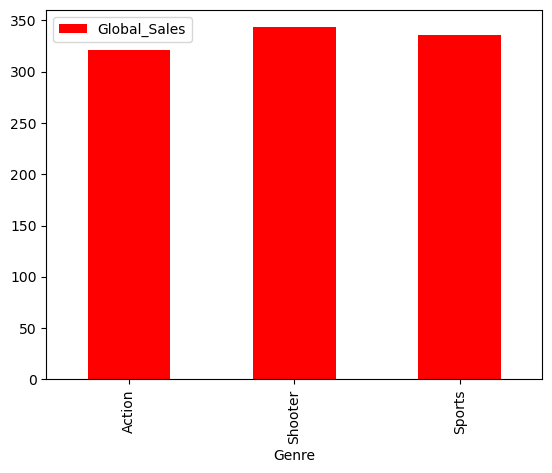

In [215]:
group[["Global_Sales"]].count().plot(kind='bar', color='red')

In [216]:
group.mean(numeric_only=True)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,502.003115,2000.853583,40.200748,14.229315,4.962025,5.075919,5.540249
Shooter,503.104956,2001.422741,41.732507,14.227638,5.111545,5.583848,5.359038
Sports,496.404762,2000.770833,41.983393,13.972708,5.143690,5.404286,5.154375


In [217]:
%matplotlib inline

In [218]:
group[['NA_Sales','EU_Sales', 'JP_Sales']].mean()

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,40.200748,14.229315,4.962025
Shooter,41.732507,14.227638,5.111545
Sports,41.983393,13.972708,5.143690


<Axes: xlabel='Genre'>

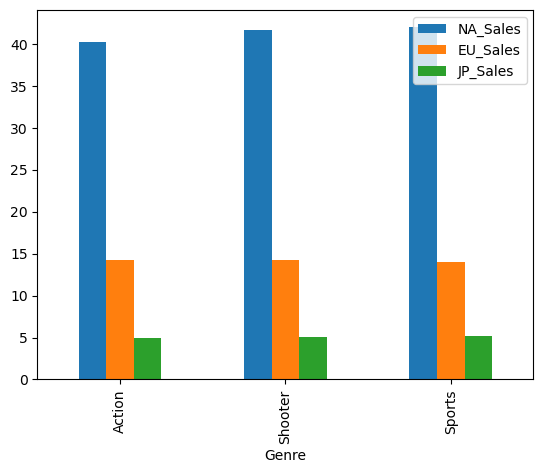

In [219]:
group[['NA_Sales','EU_Sales', 'JP_Sales']].mean().plot(kind='bar')